REGRESIÓN LINEAL SIMPLE

---
La regresión lineal usada en este notebook, consiste en únicamente dos variables; altura y peso.

*   ALTURA: Medida en metros, de un total de 10 muestras.
*   PESO: Medida en kilogramos, de un total de 10 muestras.

Considerando 10 datos de personas elegidas al azar, se agrupan su altura y peso (ambos en mt), y se registran en un Worksheet de Google, al que se le permitirá obtener información alojada en dicho documento.

OBJETIVO

Elaborar un modelo de regresión lineal que sea capaz de predecir el peso de una persona en función de su estatura. Será elaborado a partir de la información recopilada de la muestra.



In [147]:
# Se importan las librerias a utilizar, las que corresponden a PANDAS, SKLEARN y MISSINGNO
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import missingno as msno

In [138]:
# Los datos serán obtenidos a través de una hoja de cálculo alojada en Google Drive a través de un enlace.
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1wAF9YGSxCYCrZgyl7eRL_PpeHBat_6AonH0IFZ-3I0U/export?format=csv")
x = "ALTURA"
y = "PESO"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ALTURA  10 non-null     float64
 1   PESO    10 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 288.0 bytes


,ALTURA,PESO
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


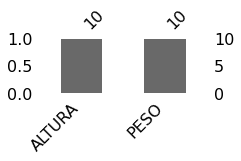

In [153]:
# Usando tres métodos diferentes, se confirma la ausencia de missing values.
msno.bar(df, figsize = (3,1))
df.info()
df.isnull()

In [120]:
# Se realiza un breve análisis exploratorio de datos usando la función .describe()
df.describe()

,ALTURA,PESO
count,10.00000,10.000000
mean,1.65000,64.300000
std,0.11907,11.842016
min,1.47000,45.000000
25%,1.56250,56.000000
50%,1.65500,63.500000
75%,1.74500,73.750000
max,1.81000,83.000000


De los datos, se obtiene que de las 10 muestras analizada, la estatura es en promedio de 1.65mt y 64kg el peso. Siendo la altura máxima de 1.81 y el peso de 83kg, y la altura mínima de 1.47mt y el peso de 45kg.

In [122]:
# La función .head() permite conocer los primeros 5 registros del dataset.
df.head()

,ALTURA,PESO
0,1.47,45
1,1.50,53
2,1.55,55
3,1.60,61
4,1.63,59


In [123]:
# Creando regresión lineal simple de una variable.
reg = LinearRegression()
reg.fit(df[["ALTURA"]], df["PESO"])

LinearRegression()

In [124]:
print("La ecuación de la recta es y = mx + b")
print("m",reg.coef_)
print("b",reg.intercept_)
print("Por lo tanto, la ecuación es Y=",reg.coef_,"*x"+"+",reg.intercept_)

La ecuación de la recta es y = mx + b
m [97.64890282]
b -96.82068965517239
Por lo tanto, la ecuación es Y= [97.64890282] *x+ -96.82068965517239


In [125]:
pred = reg.coef_*df[["ALTURA"]]+reg.intercept_

In [126]:
# Se realiza una predición de prueba, para corroborar el comportamiento de la variable.
reg.predict([[1.90]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([88.71222571])

In [154]:
# Se añade la variable PREDICCIÓN al dataframe.
df[["PREDICCION"]] = pred
df

,ALTURA,PESO,PREDICCION
0,1.47,45,46.723197
1,1.50,53,49.652665
2,1.55,55,54.535110
3,1.60,61,59.417555
4,1.63,59,62.347022
5,1.68,66,67.229467
6,1.73,70,72.111912
7,1.75,75,74.064890
8,1.78,76,76.994357
9,1.81,83,79.923824


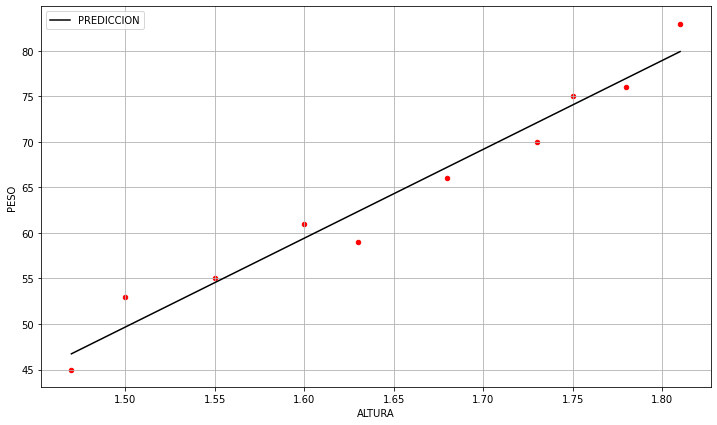

In [161]:
# Graficamos las variables ALTURA, PREDICCIÓN y PESO. Se usa un scatterplot y se agrega la linea de tendencia del modelo encontrado.
ax = df.plot.line(x="ALTURA",y="PREDICCION", color = "black")
df.plot.scatter(x="ALTURA",y="PESO",ax = ax, color = "red", figsize = (12,7)) # ax corresponde a la variable ejes.
plt.grid()

In [131]:
# Se obtiene el coeficiente de determinación del modelo
R_sq = reg.score(df[["ALTURA"]],df["PESO"])
print ("El ",R_sq*100,"del coeficiente de determinación está explicado por la variable altura.")
print ("Por lo tanto, el modelo es confiable encontrado es confiable")

El  96.40324294062317 del coeficiente de determinación está explicado por la variable altura.
Por lo tanto, el modelo es confiable encontrado es confiable


In [155]:
# Se añade un input para ingresar el valor y predecirlo con el modelo de regresión lineal
predice = input("Ingrese valor ")
reg.predict([[predice]])
print("Para la altura de ",predice,"el peso es de",reg.predict([[predice]]))

Ingrese valor 1.4
Para la altura de  1.4 el peso es de [39.88777429]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please c

CONCLUSIÓN

---

Finalmente, con un coeficiente de determinación que explica en un 96% el comportamiento de la variable, se obtiene un modelo capaz de predecir el peso de una persona en función de su altura.